In [1]:
import numpy as np
import xarray as xr
import fsspec
import matplotlib
import matplotlib.pyplot as plt
import pyqg 
import pyqg.diagnostic_tools as tools
import seaborn as sns

%matplotlib inline

In [2]:
eddy_model = pyqg.QGModel(nx=64, dt=3600.0, tmax=311040000.0, twrite=10000, tavestart=155520000.0) #defaults match up to Ross paper 

RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug


RuntimeError: Undefined plan with nthreads. This is a bug

Exception ignored in: 'pyfftw.pyfftw._fftw_plan_with_nthreads_null'
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.10/site-packages/pyqg/model.py", line 216, in __init__
    PseudoSpectralKernel.__init__(self, nz, ny, nx, ntd,
RuntimeError: Undefined plan with nthreads. This is a bug
INFO:  Logger initialized


In [3]:
# after initial run, generate snapshots of model

def generate_snapshots(model):
    snapshots = []
    snapshots.append(model.to_dataset())
    for _ in model.run_with_snapshots(tsnapint=1000*model.dt):
        snapshots.append(model.to_dataset())
    return xr.concat(snapshots, dim='time')

eddy_model_highRes = generate_snapshots(eddy_model)
eddy_model_highRes

INFO: Step: 10000, Time: 3.60e+07, KE: 1.05e-05, CFL: 0.006
INFO: Step: 20000, Time: 7.20e+07, KE: 4.52e-04, CFL: 0.055
INFO: Step: 30000, Time: 1.08e+08, KE: 4.85e-04, CFL: 0.054
INFO: Step: 40000, Time: 1.44e+08, KE: 4.64e-04, CFL: 0.048
INFO: Step: 50000, Time: 1.80e+08, KE: 5.14e-04, CFL: 0.046
INFO: Step: 60000, Time: 2.16e+08, KE: 4.81e-04, CFL: 0.042
INFO: Step: 70000, Time: 2.52e+08, KE: 4.47e-04, CFL: 0.043
INFO: Step: 80000, Time: 2.88e+08, KE: 5.03e-04, CFL: 0.051


<xarray.Dataset>
Dimensions:            (time: 87, lev: 2, y: 64, x: 64, l: 64, k: 33, lev_mid: 1)
Coordinates:
  * time               (time) float64 0.0 3.6e+06 7.2e+06 ... 3.06e+08 3.096e+08
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * y                  (y) float64 7.812e+03 2.344e+04 ... 9.766e+05 9.922e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.0001948 0.0002011
Data variables: (12/32)
    q                  (time, lev, y, x) float64 5.175e-07 ... 1.111e-07
    u                  (time, lev, y, x) float64 0.0 0.0 ... -0.01013 -0.007719
    v                  (time, lev, y, x) float64 0.0 0.0 ... -0.01259 -0.0115
    ufull              (time, lev, y, x) float64 0.025 0.025 ... -0.007719
    vfull              (time, lev, y, x) float64 0.0 0.0 ... -0.01259 -0.0115
    qh                 (time, lev, l, k) complex128 (0.0022522621825261857+0j...
    ...                 ...
    ENSgenspec         (time, l, k) float64 nan nan ... -4.022e-52 -5.967e-62
    ENSfrictionspec    (time, l, k) float64 nan nan ... -8.256e-51 -2.717e-60
    APEgenspec         (time, l, k) float64 nan nan ... -9.049e-44 -1.343e-53
    APEflux            (time, l, k) float64 nan nan nan ... 5.015e-29 1.38e-33
    KEflux             (time, l, k) float64 nan nan nan ... 2.532e-27 4.933e-32
    APEgen             (time) float64 nan nan nan ... 6.602e-11 6.595e-11
Attributes: (12/23)
    pyqg:beta:       1.5e-11
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         3600.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         0
    pyqg:tmax:       311040000.0
    pyqg:twrite:     10000
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

In [4]:
# write data to scratch bucket after initial run

import os
import xarray as xr
SCRATCH_BUCKET = os.environ['SCRATCH_BUCKET'] 
eddy_model_highRes.to_zarr('gs://leap-scratch/panalluri/scalar/eddy_lowRes.zarr')  # write data

In [2]:
import os
import xarray as xr
eddy_model_highRes = xr.open_zarr("gs://leap-scratch/panalluri/scalar/eddy_lowRes.zarr")  # load example data
eddy_model_highRes

<xarray.Dataset>
Dimensions:            (time: 87, l: 256, k: 129, lev: 2, y: 256, x: 256,
                        lev_mid: 1)
Coordinates:
  * k                  (k) float64 0.0 6.283e-06 ... 0.000798 0.0008042
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * lev                (lev) int64 1 2
  * lev_mid            (lev_mid) float64 1.5
  * time               (time) float64 0.0 3.6e+06 7.2e+06 ... 3.06e+08 3.096e+08
  * x                  (x) float64 1.953e+03 5.859e+03 ... 9.941e+05 9.98e+05
  * y                  (y) float64 1.953e+03 5.859e+03 ... 9.941e+05 9.98e+05
Data variables: (12/32)
    APEflux            (time, l, k) float64 dask.array<chunksize=(22, 64, 65), meta=np.ndarray>
    APEgen             (time) float64 dask.array<chunksize=(87,), meta=np.ndarray>
    APEgenspec         (time, l, k) float64 dask.array<chunksize=(22, 64, 65), meta=np.ndarray>
    Dissspec           (time, l, k) float64 dask.array<chunksize=(22, 64, 65), meta=np.ndarray>
    EKE                (time, lev) float64 dask.array<chunksize=(87, 2), meta=np.ndarray>
    EKEdiss            (time) float64 dask.array<chunksize=(87,), meta=np.ndarray>
    ...                 ...
    u                  (time, lev, y, x) float64 dask.array<chunksize=(22, 1, 64, 128), meta=np.ndarray>
    ufull              (time, lev, y, x) float64 dask.array<chunksize=(22, 1, 64, 128), meta=np.ndarray>
    uh                 (time, lev, l, k) complex128 dask.array<chunksize=(22, 1, 64, 65), meta=np.ndarray>
    v                  (time, lev, y, x) float64 dask.array<chunksize=(22, 1, 64, 128), meta=np.ndarray>
    vfull              (time, lev, y, x) float64 dask.array<chunksize=(22, 1, 64, 128), meta=np.ndarray>
    vh                 (time, lev, l, k) complex128 dask.array<chunksize=(22, 1, 64, 65), meta=np.ndarray>
Attributes: (12/23)
    pyqg:L:          1000000.0
    pyqg:M:          65536
    pyqg:W:          1000000.0
    pyqg:beta:       1.5e-11
    pyqg:del2:       0.8
    pyqg:delta:      0.25
    ...              ...
    pyqg:tavestart:  155520000.0
    pyqg:tc:         0
    pyqg:tmax:       311040000.0
    pyqg:twrite:     10000
    reference:       https://pyqg.readthedocs.io/en/latest/index.html
    title:           pyqg: Python Quasigeostrophic Model

In [5]:
u_lev0 = eddy_model_highRes.u.isel(lev=0)
v_lev0 = eddy_model_highRes.v.isel(lev=0)
u_lev1 = eddy_model_highRes.u.isel(lev=1)
v_lev1 = eddy_model_highRes.v.isel(lev=1)

In [6]:
xvals = eddy_model_highRes.x
yvals = eddy_model_highRes.y

In [7]:
del_x = np.diff(xvals).mean()
del_y = np.diff(yvals).mean()

In [8]:
del_t = np.diff(eddy_model_highRes.time).mean()
time = u_lev0.time

In [120]:
kappa = 1

In [10]:
domain_size = u_lev0[0].shape
domain_x = domain_size[0]
domain_y = domain_size[1]

In [121]:
import scipy
from scipy.sparse import diags

K1_coeff = kappa * del_t / (del_x**2)
K2_coeff = kappa * del_t / (del_y**2)

K1_diag = np.dot([-2]*domain_x*domain_y, K1_coeff)
K1pN_diag = np.dot([1]*(domain_x*domain_y-domain_x), K1_coeff)
K1mN_diag = np.dot([1]*(domain_x*domain_y-domain_x), K1_coeff)

K2_diag = np.dot([-2]*domain_x*domain_y, K2_coeff)
K2p1_diag = np.dot([1]*(domain_x*domain_y-1), K2_coeff)
K2m1_diag = np.dot([1]*(domain_x*domain_y-1), K2_coeff)

K1_diags = [K1_diag, K1pN_diag, K1mN_diag]
K1 = diags(K1_diags, [0, domain_x, -domain_x]).toarray()

K2_diags = [K2_diag, K2p1_diag, K2m1_diag]
K2 = diags(K2_diags, [0, 1, -1]).toarray()

K2

array([[-0.0294912,  0.0147456,  0.       , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.0147456, -0.0294912,  0.0147456, ...,  0.       ,  0.       ,
         0.       ],
       [ 0.       ,  0.0147456, -0.0294912, ...,  0.       ,  0.       ,
         0.       ],
       ...,
       [ 0.       ,  0.       ,  0.       , ..., -0.0294912,  0.0147456,
         0.       ],
       [ 0.       ,  0.       ,  0.       , ...,  0.0147456, -0.0294912,
         0.0147456],
       [ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.0147456,
        -0.0294912]])

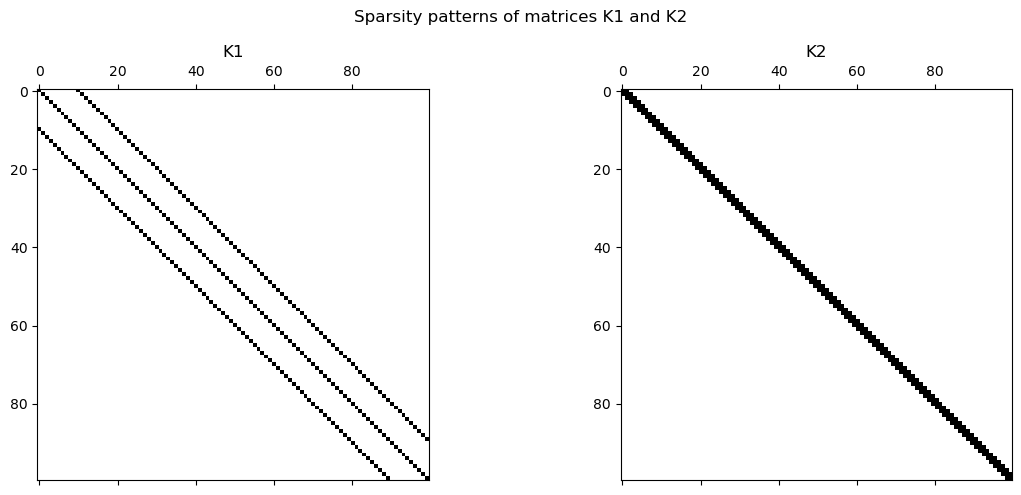

In [10]:
import scipy.sparse as sparse #for case of 10x10 domain --- don't have enough computational power to plot for actual domain

plt.figure(figsize=(12,5)).suptitle("Sparsity patterns of matrices K1 and K2")
plt.subplot(121); plt.spy(K1); plt.title("K1")
plt.subplot(122); plt.spy(K2); plt.title( "K2")
plt.tight_layout()

In [12]:
U_coeff = - del_t / (2*del_x)
V_coeff = - del_t / (2*del_y)

UpN_diag = np.dot([1]*(domain_x*domain_y-domain_x), U_coeff)
UmN_diag = np.dot([-1]*(domain_x*domain_y-domain_x), U_coeff)

Vp1_diag = np.dot([1]*(domain_x*domain_y-1), V_coeff)
Vm1_diag = np.dot([-1]*(domain_x*domain_y-1), V_coeff)

U_diags = [UpN_diag, UmN_diag]
U = diags(U_diags, [domain_x, -domain_x]).toarray()

V_diags = [Vp1_diag, Vm1_diag]
V = diags(V_diags, [1, -1]).toarray()

I_diag = np.dot([1]*domain_x*domain_y, K2_coeff)
I = diags([I_diag], [0]).toarray()

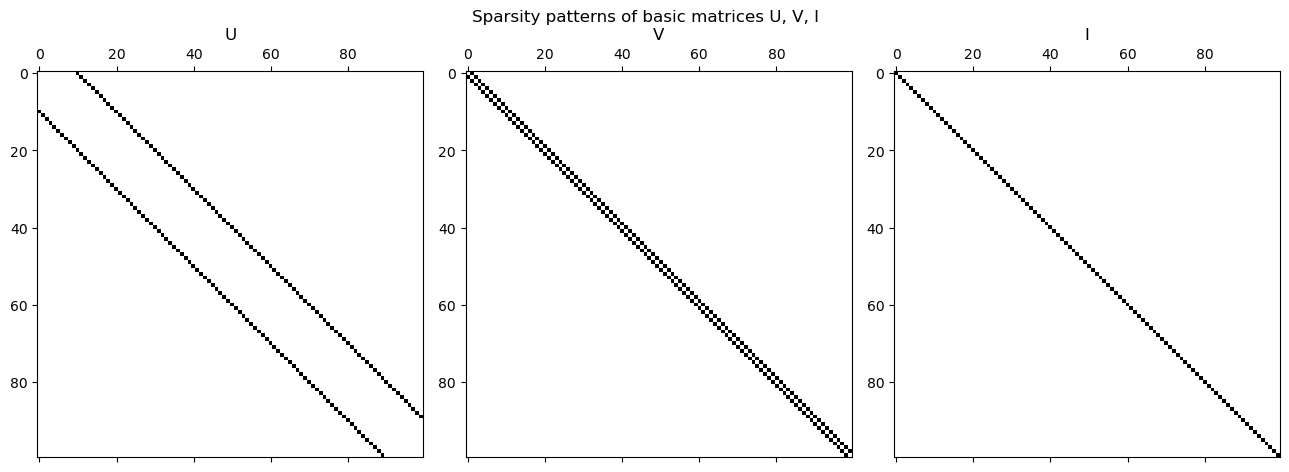

In [55]:
#for case of 10x10 domain --- don't have enough computational power to plot for actual domain

plt.figure(figsize=(13,5)).suptitle("Sparsity patterns of basic matrices U, V, I")
plt.subplot(131); plt.spy(U); plt.title("U")
plt.subplot(132); plt.spy(V); plt.title( "V")
plt.subplot(133); plt.spy(I); plt.title( "I")
plt.tight_layout()

In [122]:
scalar_init = 10*np.random.rand(domain_x*domain_y,1)
scalar_mat = scalar_init

for i in range(time.size):
    u_flat = eddy_model_highRes.isel(lev=0).u[i].to_numpy().reshape((domain_x*domain_y,1))
    v_flat = eddy_model_highRes.isel(lev=0).v[i].to_numpy().reshape((domain_x*domain_y,1))
    Uk = U * u_flat
    Vk = V * v_flat
    step_mat = (I + Uk + Vk + K1 + K2)
    scalar2 = np.matmul(step_mat, scalar_init)
    scalar_mat = np.append(scalar_mat, scalar2, axis=1)
    scalar_init = scalar2

In [123]:
scalars = np.zeros((domain_x,domain_y,time.size), dtype=np.int64)

for i in range(time.size):
    temp = scalar_mat[:,i]
    temp2 = temp.reshape((domain_x,domain_y))
    scalars[:,:,i] = temp2

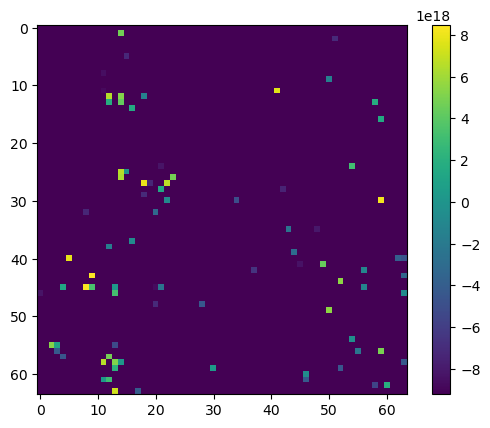

In [124]:
plt.imshow(scalars[:,:,40])
plt.colorbar()

In [125]:
scalar_init2 = 10*np.random.rand(domain_x*domain_y,1)
scalar_mat2 = scalar_init2

for i in range(time.size):
    u_flat = eddy_model_highRes.isel(lev=1).u[i].to_numpy().reshape((domain_x*domain_y,1))
    v_flat = eddy_model_highRes.isel(lev=1).v[i].to_numpy().reshape((domain_x*domain_y,1))
    Uk = U * u_flat
    Vk = V * v_flat
    step_mat = (I + Uk + Vk + K1 + K2)
    scalar2 = np.matmul(step_mat, scalar_init2)
    scalar_mat2 = np.append(scalar_mat2, scalar2, axis=1)
    scalar_init2 = scalar2

In [126]:
scalars2 = np.zeros((domain_x,domain_y,time.size), dtype=np.int64)

for i in range(time.size):
    temp = scalar_mat2[:,i]
    temp2 = temp.reshape((domain_x,domain_y))
    scalars2[:,:,i] = temp2

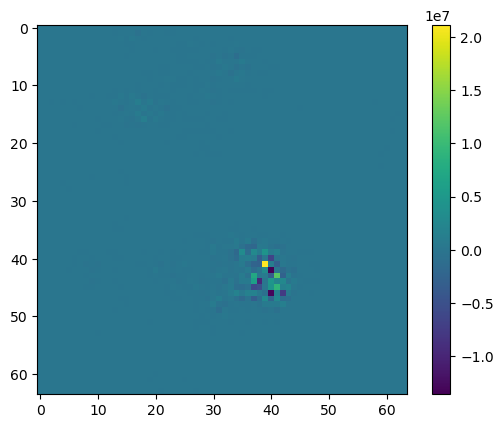

In [127]:
plt.imshow(scalars2[:,:,86])
plt.colorbar()

In [128]:
xvals = eddy_model_highRes.x
yvals = eddy_model_highRes.x
levels = eddy_model_highRes.lev
scalar_vals = [scalars, scalars2]
scalar_data = xr.DataArray(scalar_vals, coords=[levels, xvals, yvals, time], dims=['lev', 'x', 'y', 'time'])
scalar_data["u"] = eddy_model_highRes.u
scalar_data["v"] = eddy_model_highRes.v
scalar_data

<xarray.DataArray (lev: 2, x: 64, y: 64, time: 87)>
array([[[[                   0,                    0,
                             0, ..., -9223372036854775808,
          -9223372036854775808, -9223372036854775808],
         [                   0,                    0,
                             0, ..., -9223372036854775808,
          -9223372036854775808, -9223372036854775808],
         [                   9,                    0,
                             0, ..., -9223372036854775808,
          -9223372036854775808, -9223372036854775808],
         ...,
         [                   5,                    0,
                             0, ..., -9223372036854775808,
          -9223372036854775808, -9223372036854775808],
         [                   0,                    0,
                             0, ..., -9223372036854775808,
          -9223372036854775808, -9223372036854775808],
         [                   4,                    0,
                             0, ..., -9223372036854775808,
          -9223372036854775808, -9223372036854775808]],

...

        [[                   5,                    0,
                             0, ...,                    0,
                             0,                    0],
         [                   6,                    0,
                             0, ...,                    0,
                             0,                    2],
         [                   0,                    0,
                             0, ...,                    1,
                             0,                   -2],
         ...,
         [                   5,                    0,
                             0, ...,                    0,
                             1,                    0],
         [                   1,                    0,
                             0, ...,                    0,
                             0,                    0],
         [                   1,                    0,
                             0, ...,                    0,
                             0,                    0]]]])
Coordinates:
  * lev      (lev) int64 1 2
  * x        (x) float64 7.812e+03 2.344e+04 3.906e+04 ... 9.766e+05 9.922e+05
  * y        (y) float64 7.812e+03 2.344e+04 3.906e+04 ... 9.766e+05 9.922e+05
  * time     (time) float64 0.0 3.6e+06 7.2e+06 ... 3.024e+08 3.06e+08 3.096e+08
    u        (time, lev, y, x) float64 0.0 0.0 0.0 ... -0.01013 -0.007719
    v        (time, lev, y, x) float64 0.0 0.0 0.0 ... -0.01259 -0.0115

In [129]:
# Specific for animation
# Can be put in a separate script
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import os
from PIL import Image
from mpl_toolkits.axes_grid1 import make_axes_locatable
#import cmocean

# Thanks to Pavel for this function :) 
def create_animation(fun, idx, filename='my-animation.gif', dpi=200, FPS=18, loop=0):
    '''
    See https://pythonprogramming.altervista.org/png-to-gif/
    fun(i) - a function creating one snapshot, has only one input:
        - number of frame i
    idx - range of frames, i in idx
    FPS - frames per second
    filename - animation name
    dpi - set 300 or so to increase quality
    loop - number of repeats of the gif
    '''
    frames = []
    for i in idx:
        fun(i)
        plt.savefig('.frame.png', dpi=dpi, bbox_inches='tight')
        plt.close()
        frames.append(Image.open('.frame.png').convert('RGB'))
        print(f'Frame {i} is created', end='\r')
    os.system('rm .frame.png')
    # How long to persist one frame in milliseconds to have a desired FPS
    duration = 1000 / FPS
    print(f'Animation at FPS={FPS} will last for {len(idx)/FPS} seconds')
    frames[0].save(
        filename, format='GIF',
        append_images=frames[1:],
        save_all=True,
        duration=duration,
        loop=loop)


In [130]:
def plot_fun(idT): 
    plt.imshow(scalars[:,:,idT])
    plt.title("Top Layer Scalar Values")
    plt.colorbar()

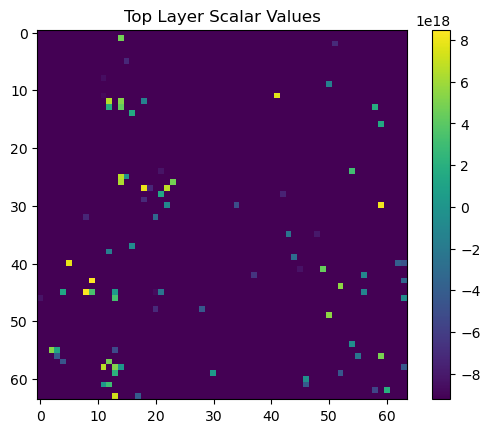

In [131]:
plot_fun(40)

In [132]:
create_animation(plot_fun, range(0, 87), 'topLayerScalars.gif', dpi=100)

Animation at FPS=18 will last for 4.833333333333333 seconds


In [133]:
def plot_fun2(idT): 
    plt.imshow(scalars2[:,:,idT])
    plt.title("Bottom Layer Scalar Values")
    plt.colorbar()

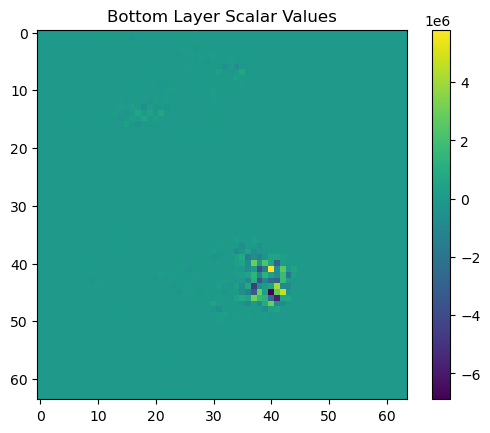

In [134]:
plot_fun2(85)

In [135]:
create_animation(plot_fun2, range(0, 87), 'bottomLayerScalars.gif', dpi=100)

Animation at FPS=18 will last for 4.833333333333333 seconds
